In [1]:
import pandas as pd

data = pd.read_excel('БД ПКМ.xlsx', header=[0, 1])


name_columns = []
for i in range(len(data.columns)):
    if data.columns[i][1] != f'Unnamed: {i}_level_1':
        name_columns.append((data.columns[i][0] + ': ' + data.columns[i][1]).replace('\n', " "))
    else:
        name_columns.append((data.columns[i][0]).replace('\n', " "))
data.columns = name_columns
data.replace('-', None, inplace=True)


In [2]:
matching_cols = [col for col in data.columns if col.startswith('ОСНОВНЫЕ СВОЙСТВА ПКМ:')]

# Check if columns contain NaNs
cols_without_nans = [col for col in matching_cols if data[col].notna().all()]


In [8]:
df = data[cols_without_nans]

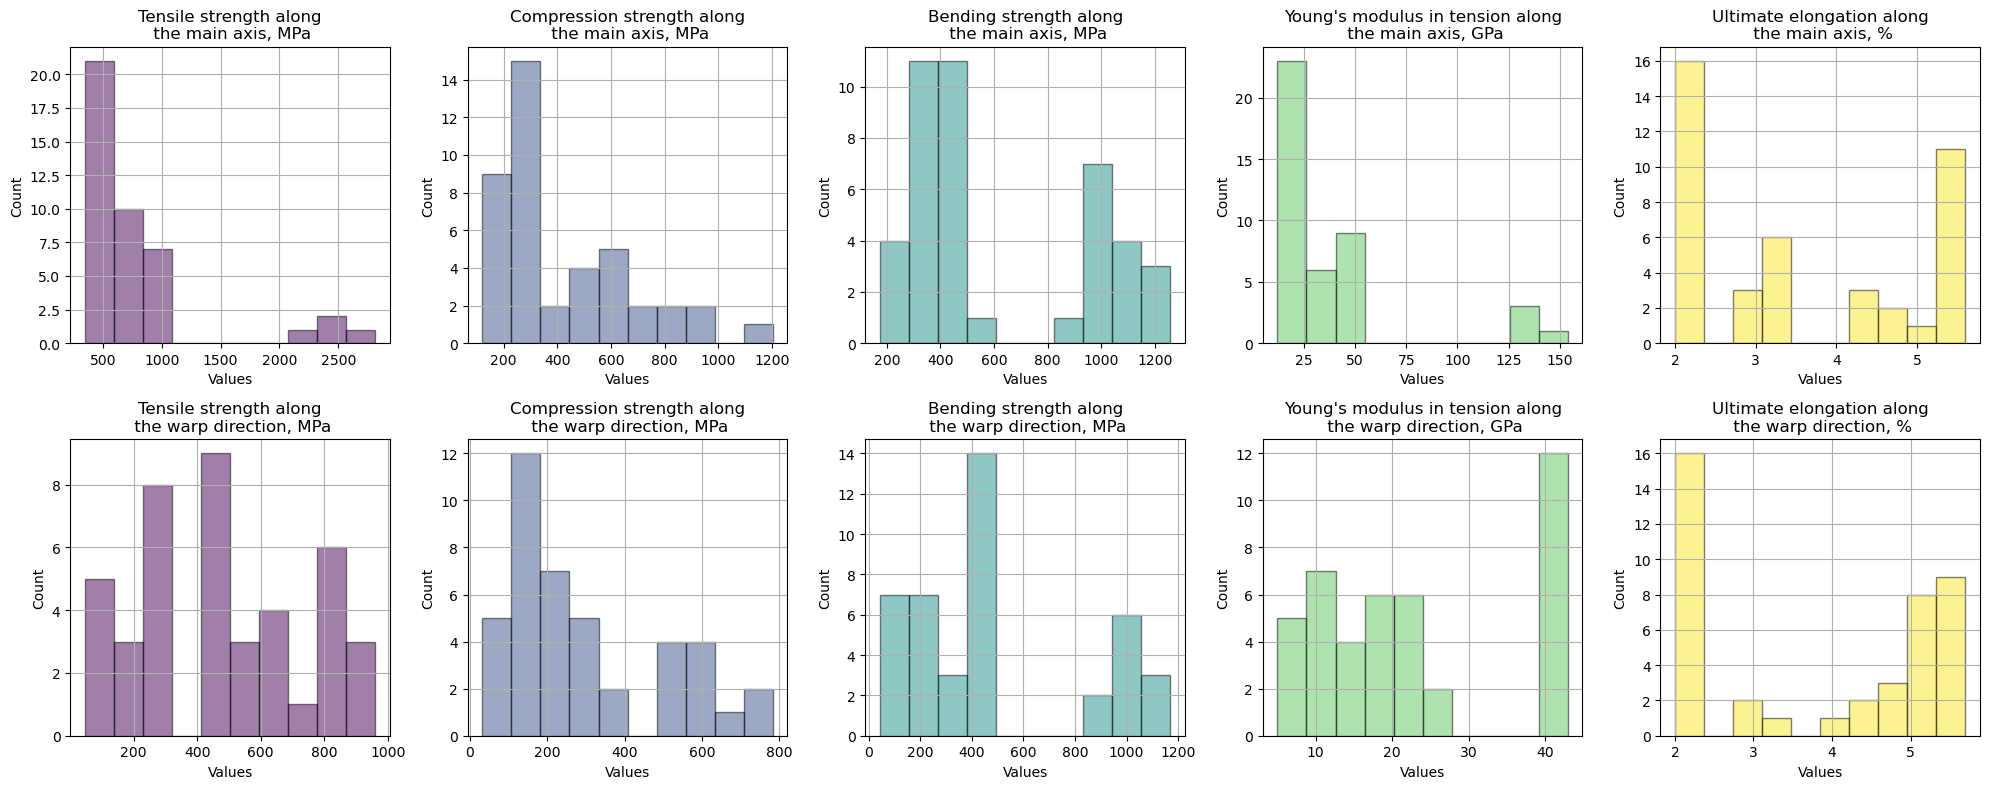

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming df is your DataFrame and cols_without_nans contains column names without NaNs
# Replace 'df' and 'cols_without_nans' with your DataFrame and column names respectively

# Filter columns containing the phrases 'по основе' and 'по утку'
cols_osnovnie = [col for col in cols_without_nans if 'по основе' in col and 'ТКЛР' not in col]
cols_po_utku = [col for col in cols_without_nans if 'по утку' in col]

osn_labels = ['Tensile strength along\n the main axis, MPa',
'Compression strength along\n the main axis, MPa',
'Bending strength along\n the main axis, MPa',
"Young's modulus in tension along\n the main axis, GPa",
'Ultimate elongation along\n the main axis, %',
'Tensile modulus of elasticity along\n the main axis, GPa']

utk_labels = ['Tensile strength along\n the warp direction, MPa',
'Compression strength along\n the warp direction, MPa',
'Bending strength along\n the warp direction, MPa',
"Young's modulus in tension along\n the warp direction, GPa",
'Ultimate elongation along\n the warp direction, %',
'Tensile modulus of elasticity along\n the warp direction, GPa']

# Define gradient colors
colors = plt.cm.viridis(np.linspace(0, 1, len(cols_po_utku)))

# Plot histograms for 'по основе'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, col_osnovnie in enumerate(cols_osnovnie):
    ax = axes[0, i % 5]  # Adjusting index for subplot in the second row
    df[col_osnovnie].hist(alpha=0.5, ax=ax, color=colors[i], edgecolor='black')
    ax.set_title(f'{osn_labels[i]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Count')


# Plot histograms for 'по утку'
for i, col_po_utku in enumerate(cols_po_utku):
    ax = axes[1, i % 5]  # Adjusting index for subplot in the second row
    df[col_po_utku].hist(alpha=0.5, ax=ax, color=colors[i], edgecolor='black')  # Add edgecolor
    ax.set_title(f'{utk_labels[i]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Count')


plt.tight_layout()
plt.savefig('hists.pdf')
plt.show()

In [10]:
# Extract columns present in cols_without_nans but not in cols_po_utku or cols_osnovnie
cols_rest = set(cols_without_nans) - set(cols_po_utku) - set(cols_osnovnie)

cols_rest = list(cols_rest)


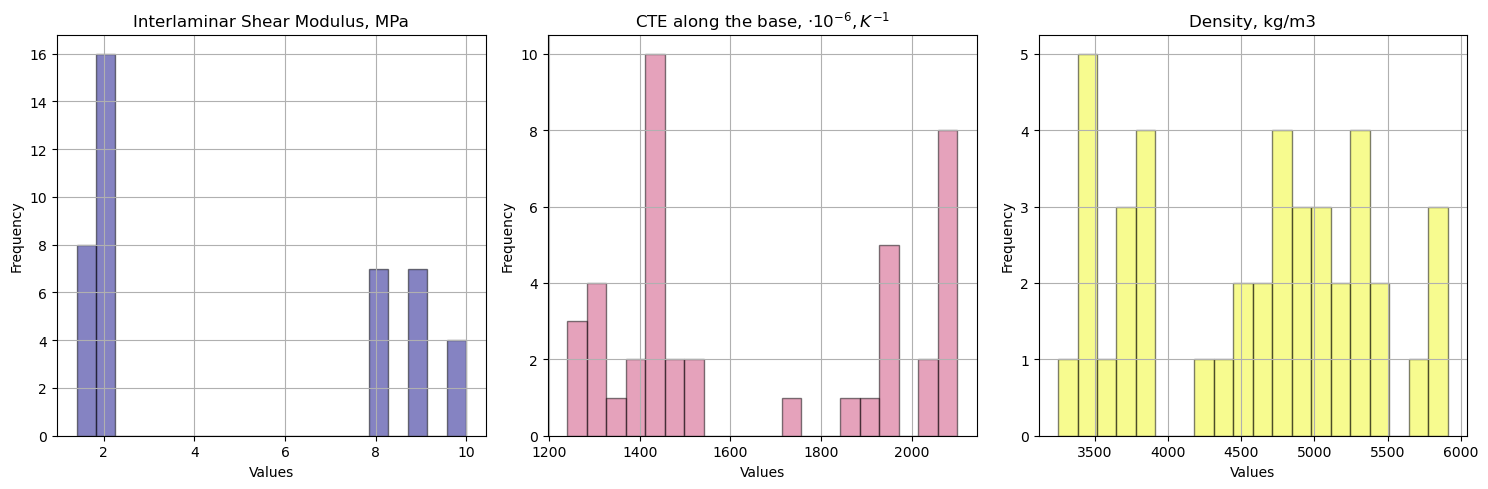

In [11]:
# Define gradient colors using the 'plasma' colormap
colors = plt.cm.plasma(np.linspace(0, 1, len(cols_rest)))


rest_labels = ['Interlaminar Shear Modulus, MPa',
'CTE along the base, $\cdot10^{-6}, K^{-1}$',
'Density, kg/m3']

# Plot histograms for 'по основе'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col_rest in enumerate(cols_rest):
    ax = axes[i % 3]  # Adjusting index for subplot
    df[col_rest].hist(alpha=0.5, ax=ax, color=colors[i], edgecolor='black', bins=20)  # Changed col_osnovnie to col_rest
    ax.set_title(f'{rest_labels[i]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('rest.pdf')
plt.show()



In [12]:
samples = df[col_osnovnie].sample(n=df.shape[0]*10, replace=True, random_state=42)



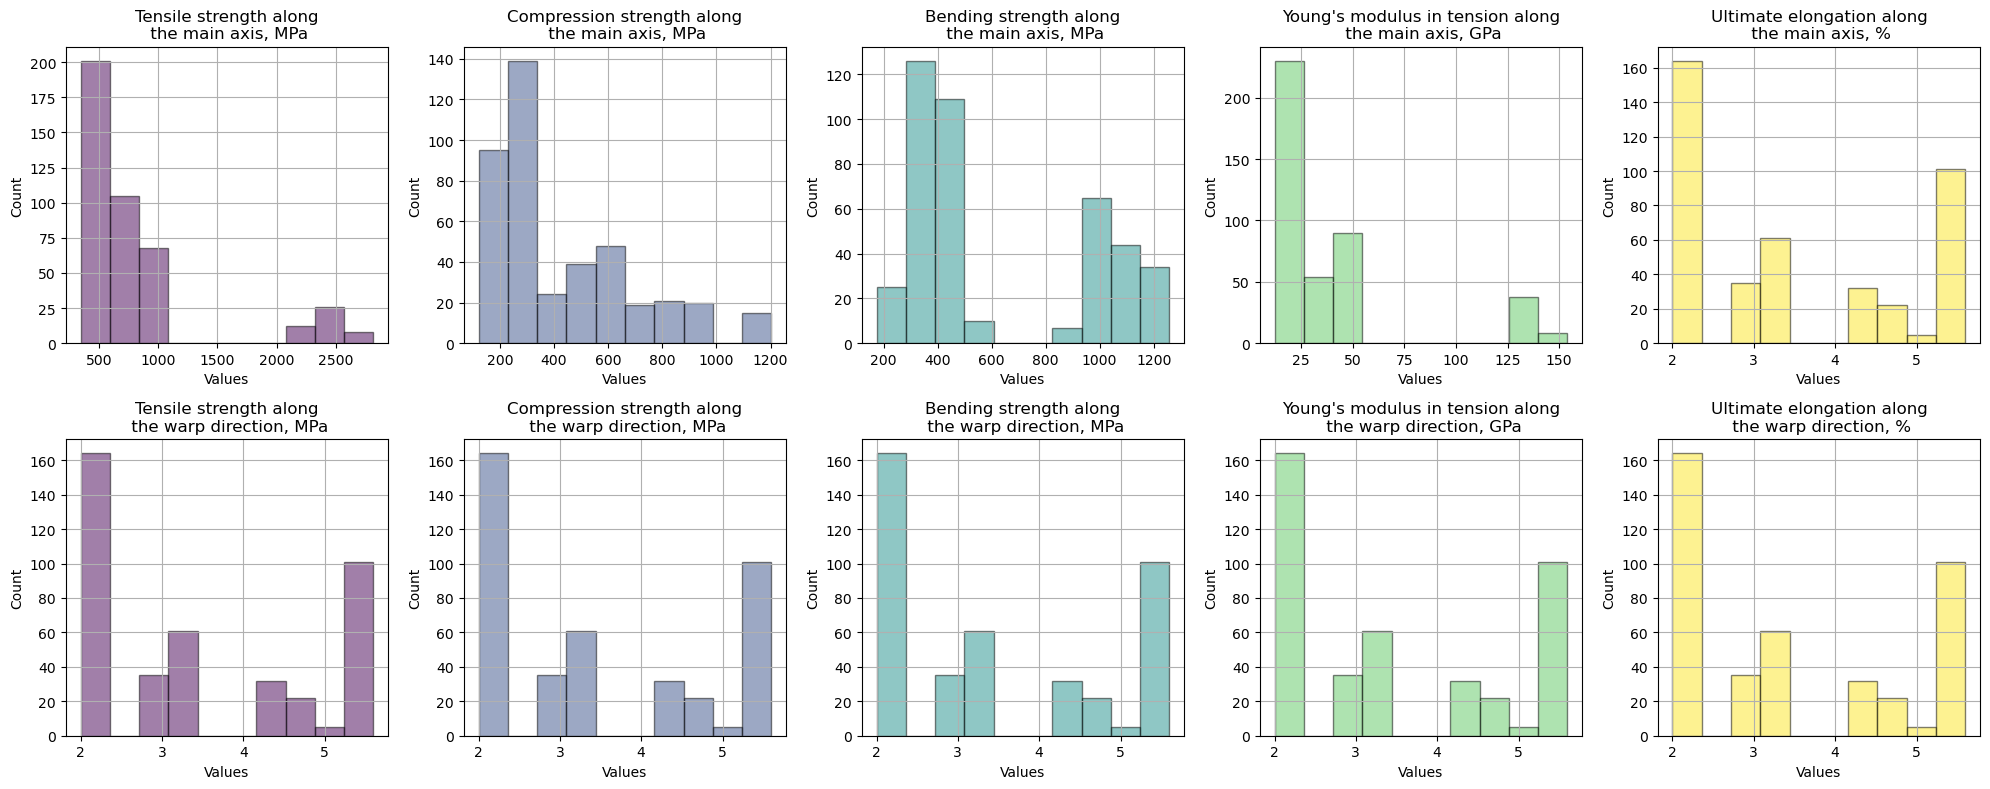

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming df is your DataFrame and cols_without_nans contains column names without NaNs
# Replace 'df' and 'cols_without_nans' with your DataFrame and column names respectively

# Filter columns containing the phrases 'по основе' and 'по утку'
cols_osnovnie = [col for col in cols_without_nans if 'по основе' in col and 'ТКЛР' not in col]
cols_po_utku = [col for col in cols_without_nans if 'по утку' in col]

osn_labels = ['Tensile strength along\n the main axis, MPa',
'Compression strength along\n the main axis, MPa',
'Bending strength along\n the main axis, MPa',
"Young's modulus in tension along\n the main axis, GPa",
'Ultimate elongation along\n the main axis, %',
'Tensile modulus of elasticity along\n the main axis, GPa']

utk_labels = ['Tensile strength along\n the warp direction, MPa',
'Compression strength along\n the warp direction, MPa',
'Bending strength along\n the warp direction, MPa',
"Young's modulus in tension along\n the warp direction, GPa",
'Ultimate elongation along\n the warp direction, %',
'Tensile modulus of elasticity along\n the warp direction, GPa']

# Define gradient colors
colors = plt.cm.viridis(np.linspace(0, 1, len(cols_po_utku)))

# Plot histograms for 'по основе'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, col_osnovnie in enumerate(cols_osnovnie):
    ax = axes[0, i % 5]  # Adjusting index for subplot in the second row
    (df[col_osnovnie].sample(n=df.shape[0]*10, replace=True, random_state=42)).hist(alpha=0.5, ax=ax, color=colors[i], edgecolor='black')
    ax.set_title(f'{osn_labels[i]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Count')


# Plot histograms for 'по утку'
for i, col_po_utku in enumerate(cols_po_utku):
    ax = axes[1, i % 5]  # Adjusting index for subplot in the second row
    (df[col_osnovnie].sample(n=df.shape[0]*10, replace=True, random_state=42)).hist(alpha=0.5, ax=ax, color=colors[i], edgecolor='black')  # Add edgecolor
    ax.set_title(f'{utk_labels[i]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Count')


plt.tight_layout()
plt.savefig('hists10.pdf')
plt.show()

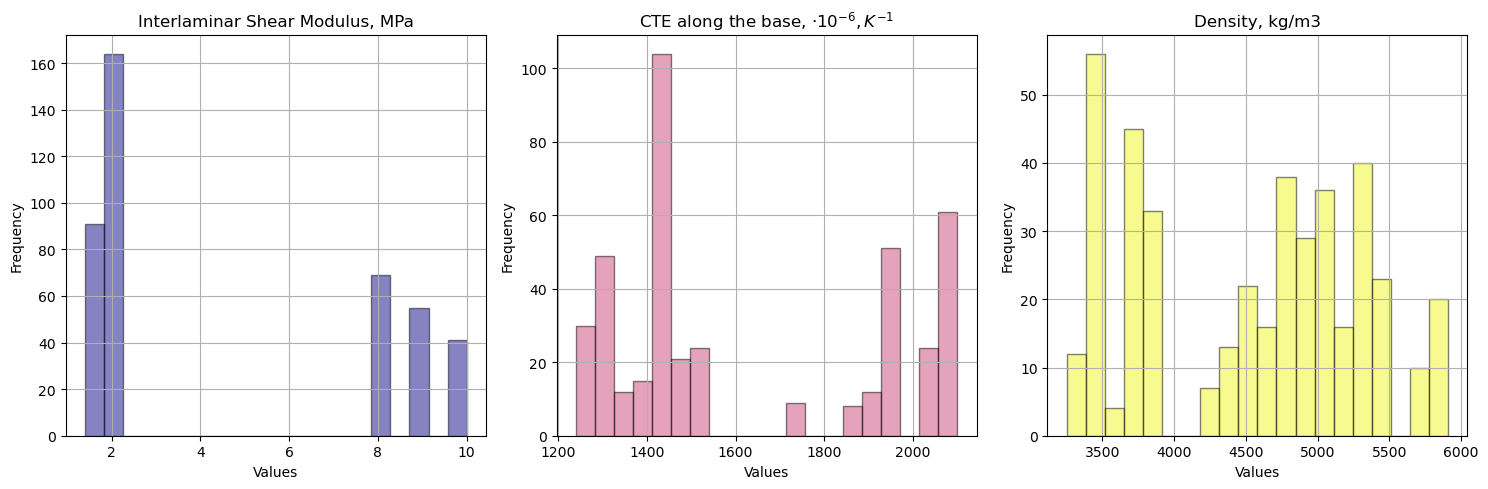

In [14]:
# Define gradient colors using the 'plasma' colormap
colors = plt.cm.plasma(np.linspace(0, 1, len(cols_rest)))


rest_labels = ['Interlaminar Shear Modulus, MPa',
'CTE along the base, $\cdot10^{-6}, K^{-1}$',
'Density, kg/m3']

# Plot histograms for 'по основе'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col_rest in enumerate(cols_rest):
    ax = axes[i % 3]  # Adjusting index for subplot
    (df[col_rest].sample(n=df.shape[0]*10, replace=True, random_state=42)).hist(alpha=0.5, ax=ax, color=colors[i], edgecolor='black', bins=20)  # Changed col_osnovnie to col_rest
    ax.set_title(f'{rest_labels[i]}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('rest10.pdf')
plt.show()



In [27]:
# Assuming 'ПКМ' is the column containing the data and 'ТКАНЬ' is the corresponding column
unique_pairs = {pkm: data[data['ПКМ'] == pkm]['ТКАНЬ: Название'].unique() for pkm in data['ПКМ'].unique()}
unique_pairs

{'Базальтопластик': array(['ТБК-100'], dtype=object),
 'Стеклопластик': array(['Т-10 (92)', 'Т-13', 'Т-11', 'Т-СУ 8/3(ВМП)-78', 'Т-25'],
       dtype=object),
 'Углепластик': array(['CC245', 'СС206', 'Лента T700SC', 'Лента UMT49', 'УТ-900-3',
        'Лента из волокна HTS45', 'Лента из волокна IMS65'], dtype=object),
 'Арамидопластик': array(['Т-43-76(А)', 'Сатин 5/3 (СВМ14,3х2 + ВМП7,2х1) х3',
        'Сатин 5/3 (СВМ14,3х2 + ВМП7,2х1) х2', 'Т-42-78', 'Т-42/1-76'],
       dtype=object)}

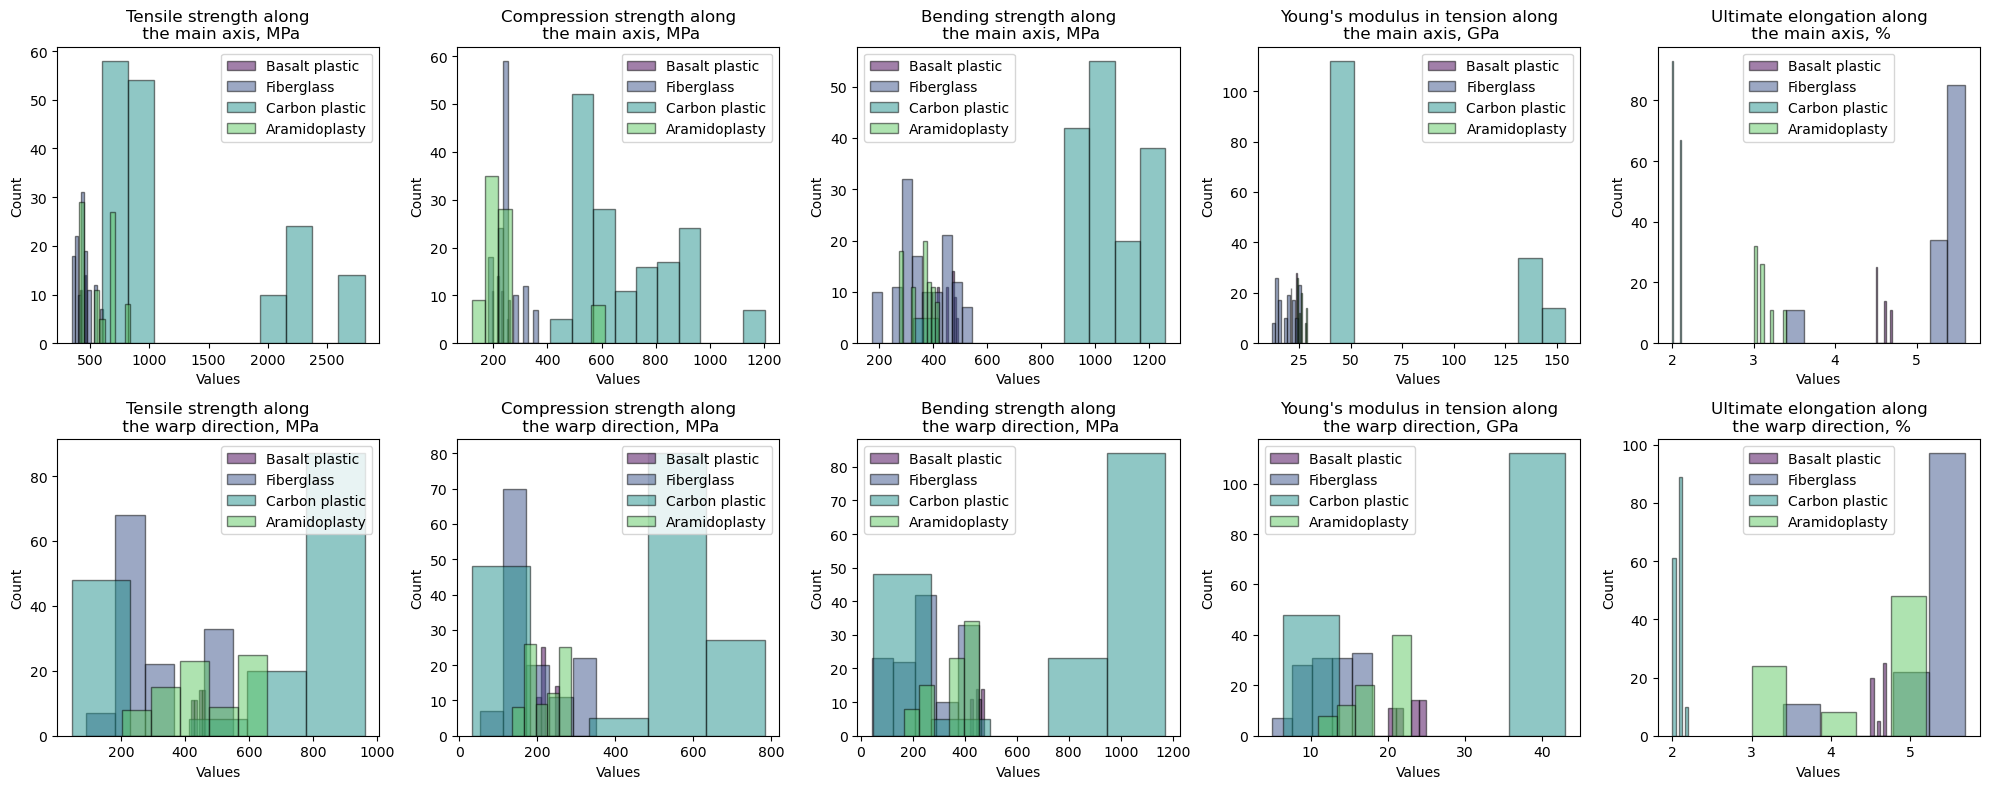

In [16]:
# Define labels
osn_labels = [
    'Tensile strength along\n the main axis, MPa',
    'Compression strength along\n the main axis, MPa',
    'Bending strength along\n the main axis, MPa',
    "Young's modulus in tension along\n the main axis, GPa",
    'Ultimate elongation along\n the main axis, %'
]

utk_labels = [
    'Tensile strength along\n the warp direction, MPa',
    'Compression strength along\n the warp direction, MPa',
    'Bending strength along\n the warp direction, MPa',
    "Young's modulus in tension along\n the warp direction, GPa",
    'Ultimate elongation along\n the warp direction, %'
]

labels = ['Basalt plastic', 'Fiberglass', 'Carbon plastic', 'Aramidoplasty']

# Define gradient colors
colors = plt.cm.viridis(np.linspace(0, 1, len(osn_labels)))

# Plot histograms for each unique value of 'ПКМ'
fig, axes = plt.subplots(nrows=2, ncols=len(osn_labels), figsize=(20, 8))

for i, osn_label in enumerate(osn_labels):
    for j, pkm_value in enumerate(data['ПКМ'].unique()):
        subset = data[data['ПКМ'] == pkm_value]
        subset = subset.sample(n=subset.shape[0] * 10, replace=True, random_state=124)

        # Plot histograms for 'по основе'
        ax_osn = axes[0, i]
        ax_osn.hist(subset[cols_osnovnie[i]], bins=10, alpha=0.5, color=colors[j], edgecolor='black',
                    label=labels[j % len(labels)])
        ax_osn.set_title(osn_label)
        ax_osn.set_xlabel('Values')
        ax_osn.set_ylabel('Count')
        ax_osn.legend()

        # Plot histograms for 'по утку'
        ax_utk = axes[1, i]
        ax_utk.hist(subset[cols_po_utku[i]], bins=5, alpha=0.5, color=colors[j], edgecolor='black',
                    label=labels[j % len(labels)])
        ax_utk.set_title(utk_labels[i])
        ax_utk.set_xlabel('Values')
        ax_utk.set_ylabel('Count')
        ax_utk.legend()

plt.tight_layout()
plt.savefig('hists_pkm_10.pdf')
plt.show()


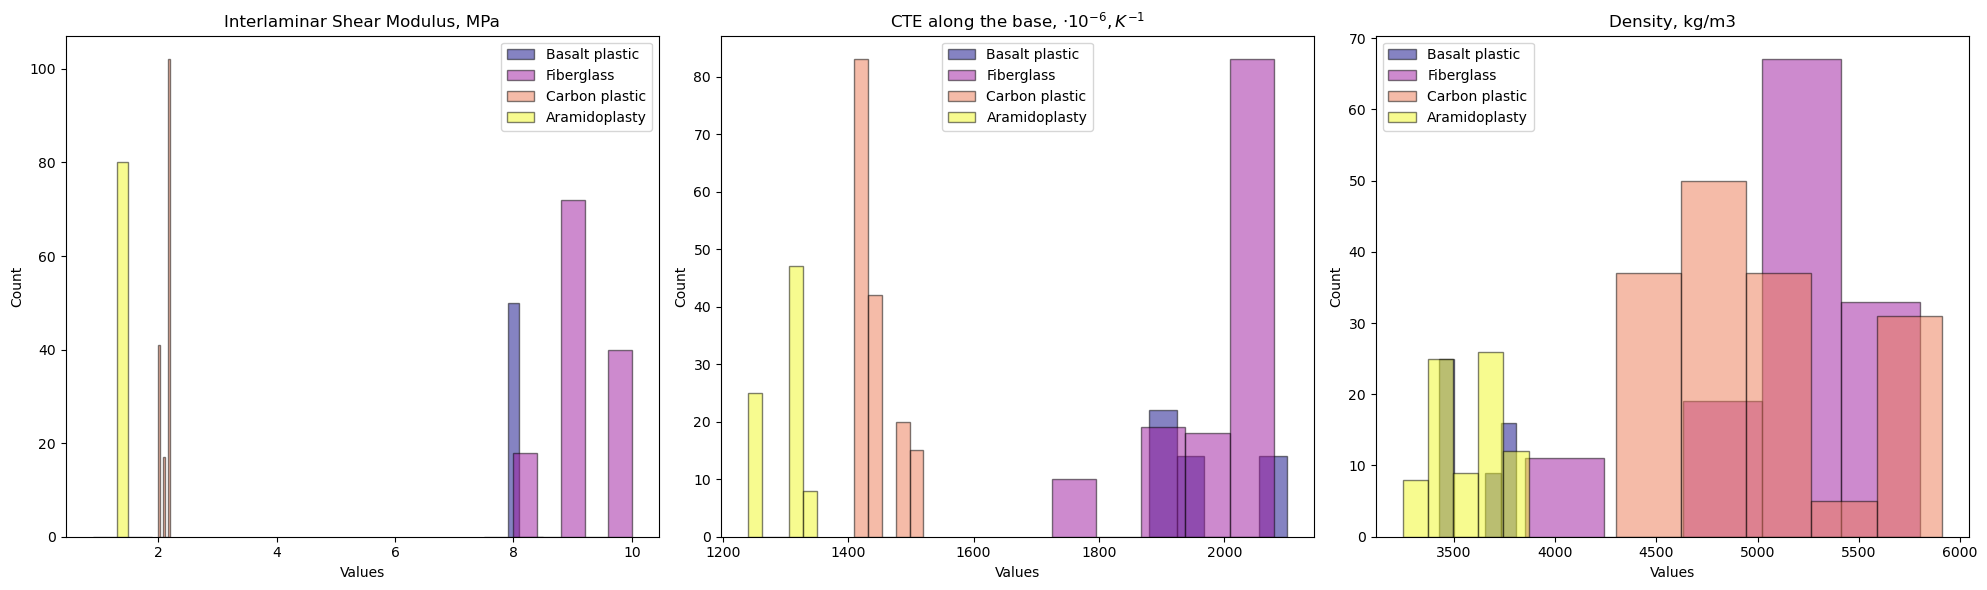

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# Define gradient colors using the 'plasma' colormap for each subplot
colors = plt.cm.plasma(np.linspace(0, 1, len(data['ПКМ'].unique())))


rest_labels = ['Interlaminar Shear Modulus, MPa',
               'CTE along the base, $\cdot10^{-6}, K^{-1}$',
               'Density, kg/m3']

labels = ['Basalt plastic', 'Fiberglass', 'Carbon plastic', 'Aramidoplasty']

# Plot histograms for each unique value of 'ПКМ'
fig, axes = plt.subplots(nrows=1, ncols=len(rest_labels), figsize=(20, 6))

for i, rest_label in enumerate(rest_labels):
    for j, pkm_value in enumerate(data['ПКМ'].unique()):
        subset = data[data['ПКМ'] == pkm_value]
        subset = subset.sample(n=subset.shape[0] * 10, replace=True, random_state=124)

        # Plot histograms
        ax = axes[i]
        ax.hist(subset[cols_rest[i]], bins=5, alpha=0.5, color=colors[j % len(data['ПКМ'].unique())], edgecolor='black',
                label=labels[j % len(labels)])
        ax.set_title(rest_label)
        ax.set_xlabel('Values')
        ax.set_ylabel('Count')
        ax.legend()

plt.tight_layout()
plt.savefig('hists_pkm_10_subfig3.pdf')
plt.show()



In [32]:
    
# Создаем словарь для хранения соответствий ПКМ и видов сплетения
pkm_to_weave = {}

# Перебираем уникальные значения в столбце 'ПКМ'
for pkm_value in data['ПКМ'].unique():
    # Получаем все соответствующие виды сплетения для данного ПКМ
    corresponding_weaves = data[data['ПКМ'] == pkm_value]['ТКАНЬ: Вид плетения'].tolist()
    # Сохраняем список соответствий в словаре
    pkm_to_weave[pkm_value] = corresponding_weaves

# Выводим соответствия ПКМ и видов сплетения
for pkm_value, weaves in pkm_to_weave.items():
    print(f'ПКМ: {pkm_value} - Виды сплетения: {", ".join(weaves)}')



ПКМ: Базальтопластик - Виды сплетения: Полотняное, Полотняное, Полотняное, Полотняное, Полотняное
ПКМ: Стеклопластик - Виды сплетения: Сатин, Полотняное, Полотняное, Полотняное, Полотняное, Полотняное, Сатин, Сатин, Сатин, Сатин, Сатин, Полотняное, Сатин
ПКМ: Углепластик - Виды сплетения: Саржа, Саржа, Саржа, Саржа, Саржа, Саржа, Саржа, Саржа, Саржа, Саржа, Саржа, Однонаправленная, Однонаправленная , Саржа, Однонаправленная, Однонаправленная
ПКМ: Арамидопластик - Виды сплетения: Сатин, Сатин, Сатин, Сатин, Сатин, Сатин, Полотняное, Сатин


In [40]:
tkani = [col for col in data.columns if 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ' in col and 'Кол-во нитей' not in col]
tkani

['ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Разрывная нагрузка по основе, Н (кгс)',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Разрывная нагрузка по утку, Н (кгс)',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Прочность при растяжении по основе, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Прочность при растяжении по утку, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Модуль упругости при растяжении по основе, ГПа',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Модуль упругости при растяжении по утку, ГПа',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Удлинение на разрыв по основе, %',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Удлинение на разрыв по утку, %',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Поверхностная плотность, г/м2',
 'ОСНОВНЫЕ СВОЙСТВА ТКАНИ: Толщина, мм']

In [42]:
cols_without_nans

['ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по основе, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на растяжение по утку, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на сжатие по основе, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на сжатие по утку, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на изгиб по основе, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Прочность на изгиб по утку, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Модуль упругости при растяжении по основе, ГПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Модуль упругости при растяжении по утку, ГПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Модуль межслоевого сдвига, МПа',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Относительное удлинение при разрыве по основе, %',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Относительное удлинение при разрыве по утку, %',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: ТКЛР по основе, х10^-6, K^-1 ',
 'ОСНОВНЫЕ СВОЙСТВА ПКМ: Плотность, кг/м3']

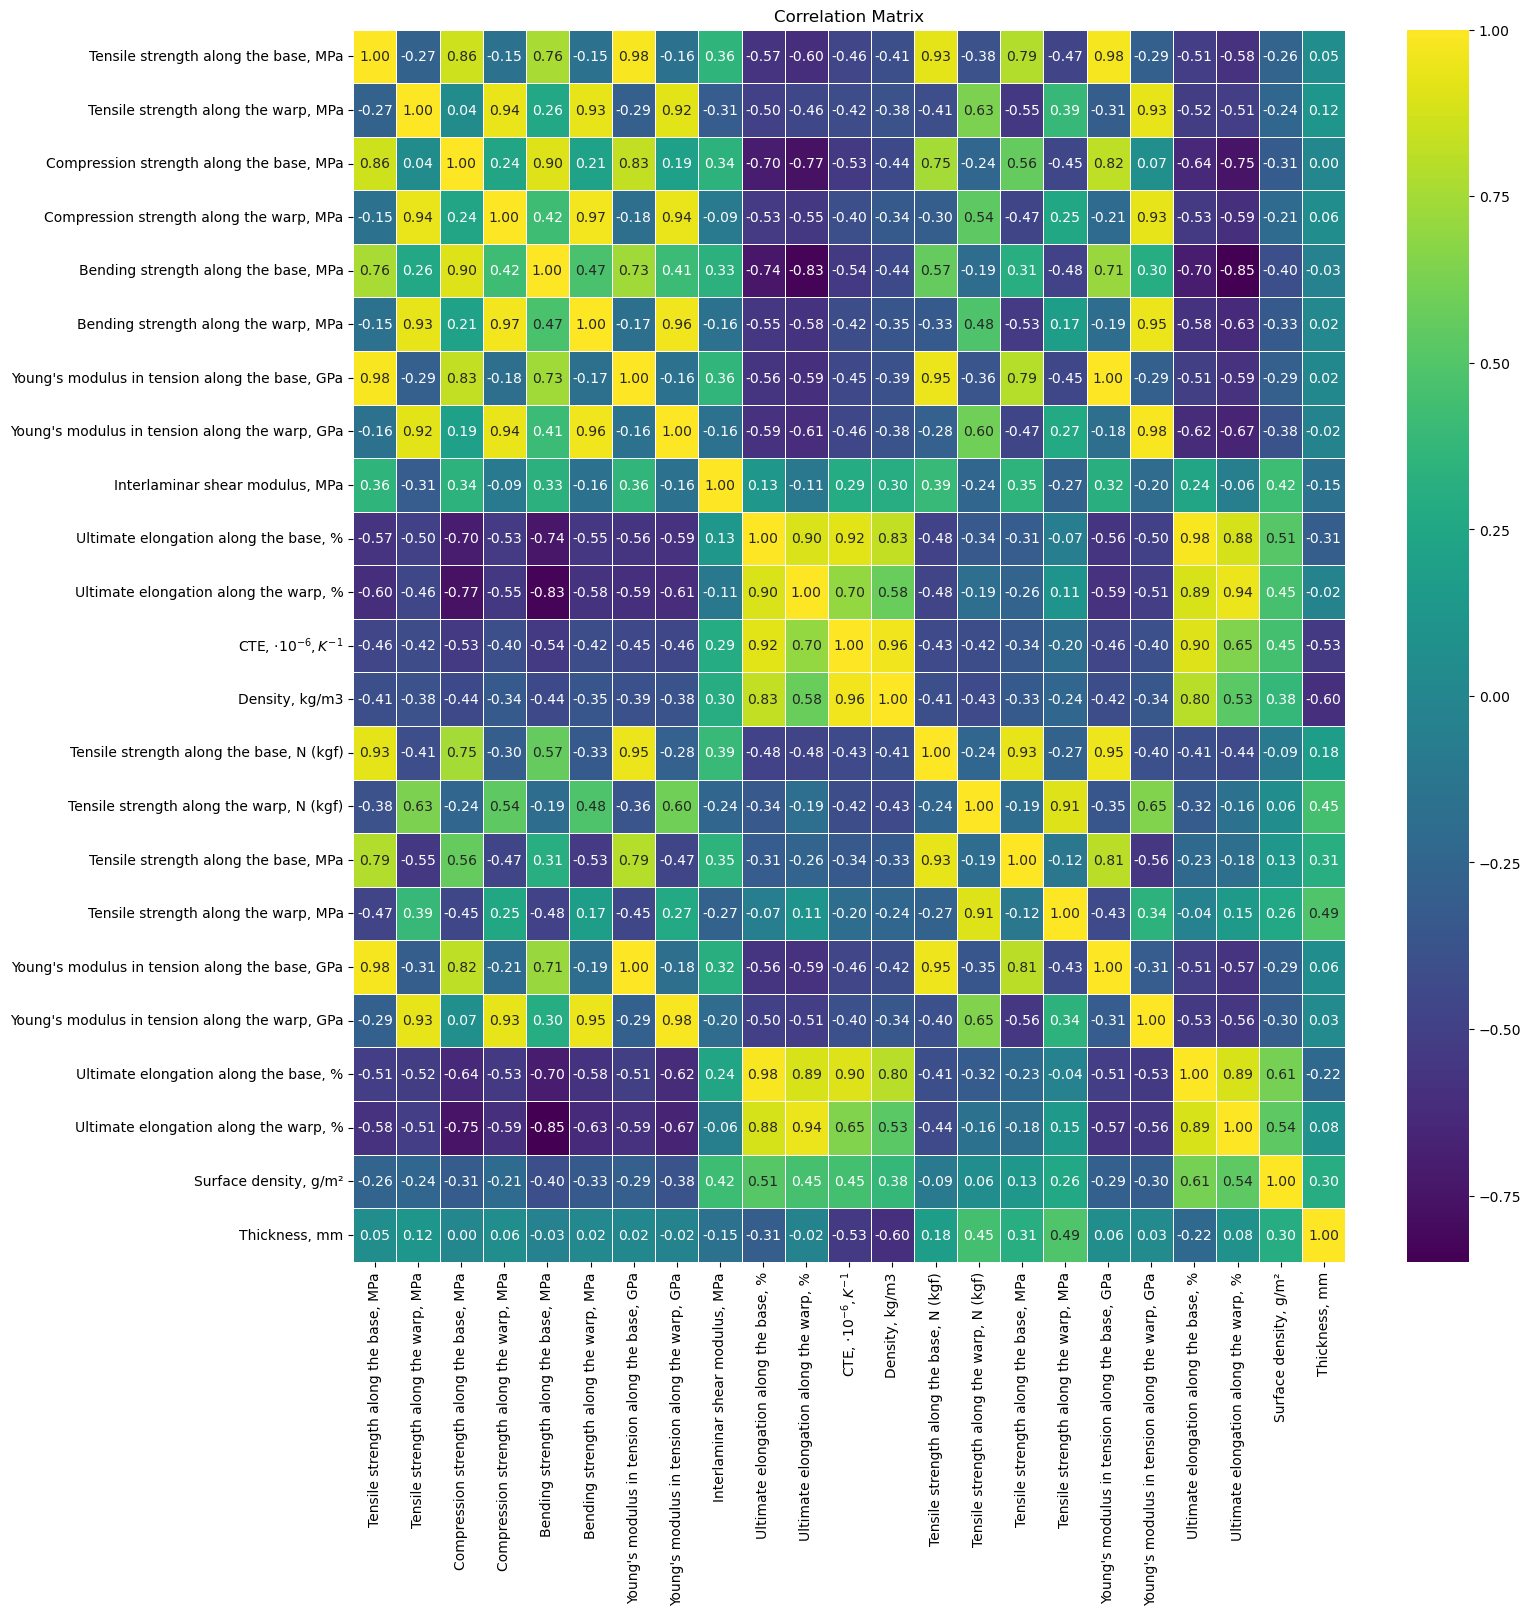

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = labels_1 + labels_2
# Drop NaN values from the DataFrame
data_clean = data[cols_without_nans+tkani].dropna()

# Calculate the correlation matrix
corr_matrix = data_clean.corr()

# Create a heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, xticklabels=labels, yticklabels=labels)
plt.title('Correlation Matrix')
plt.show()


In [46]:
labels_1 = [
    'Tensile strength along the base, MPa',
    'Tensile strength along the warp, MPa',
    'Compression strength along the base, MPa',
    'Compression strength along the warp, MPa',
    'Bending strength along the base, MPa',
    'Bending strength along the warp, MPa',
    "Young's modulus in tension along the base, GPa",
    "Young's modulus in tension along the warp, GPa",
    'Interlaminar shear modulus, MPa',
    'Ultimate elongation along the base, %',
    'Ultimate elongation along the warp, %',
    'CTE, $\cdot10^{-6}, K^{-1}$',
    'Density, kg/m3'
]

In [47]:
labels_2 = [
    'Tensile strength along the base, N (kgf)',
    'Tensile strength along the warp, N (kgf)',
    'Tensile strength along the base, MPa',
    'Tensile strength along the warp, MPa',
    "Young's modulus in tension along the base, GPa",
    "Young's modulus in tension along the warp, GPa",
    'Ultimate elongation along the base, %',
    'Ultimate elongation along the warp, %',
    'Surface density, g/m²',
    'Thickness, mm'
]


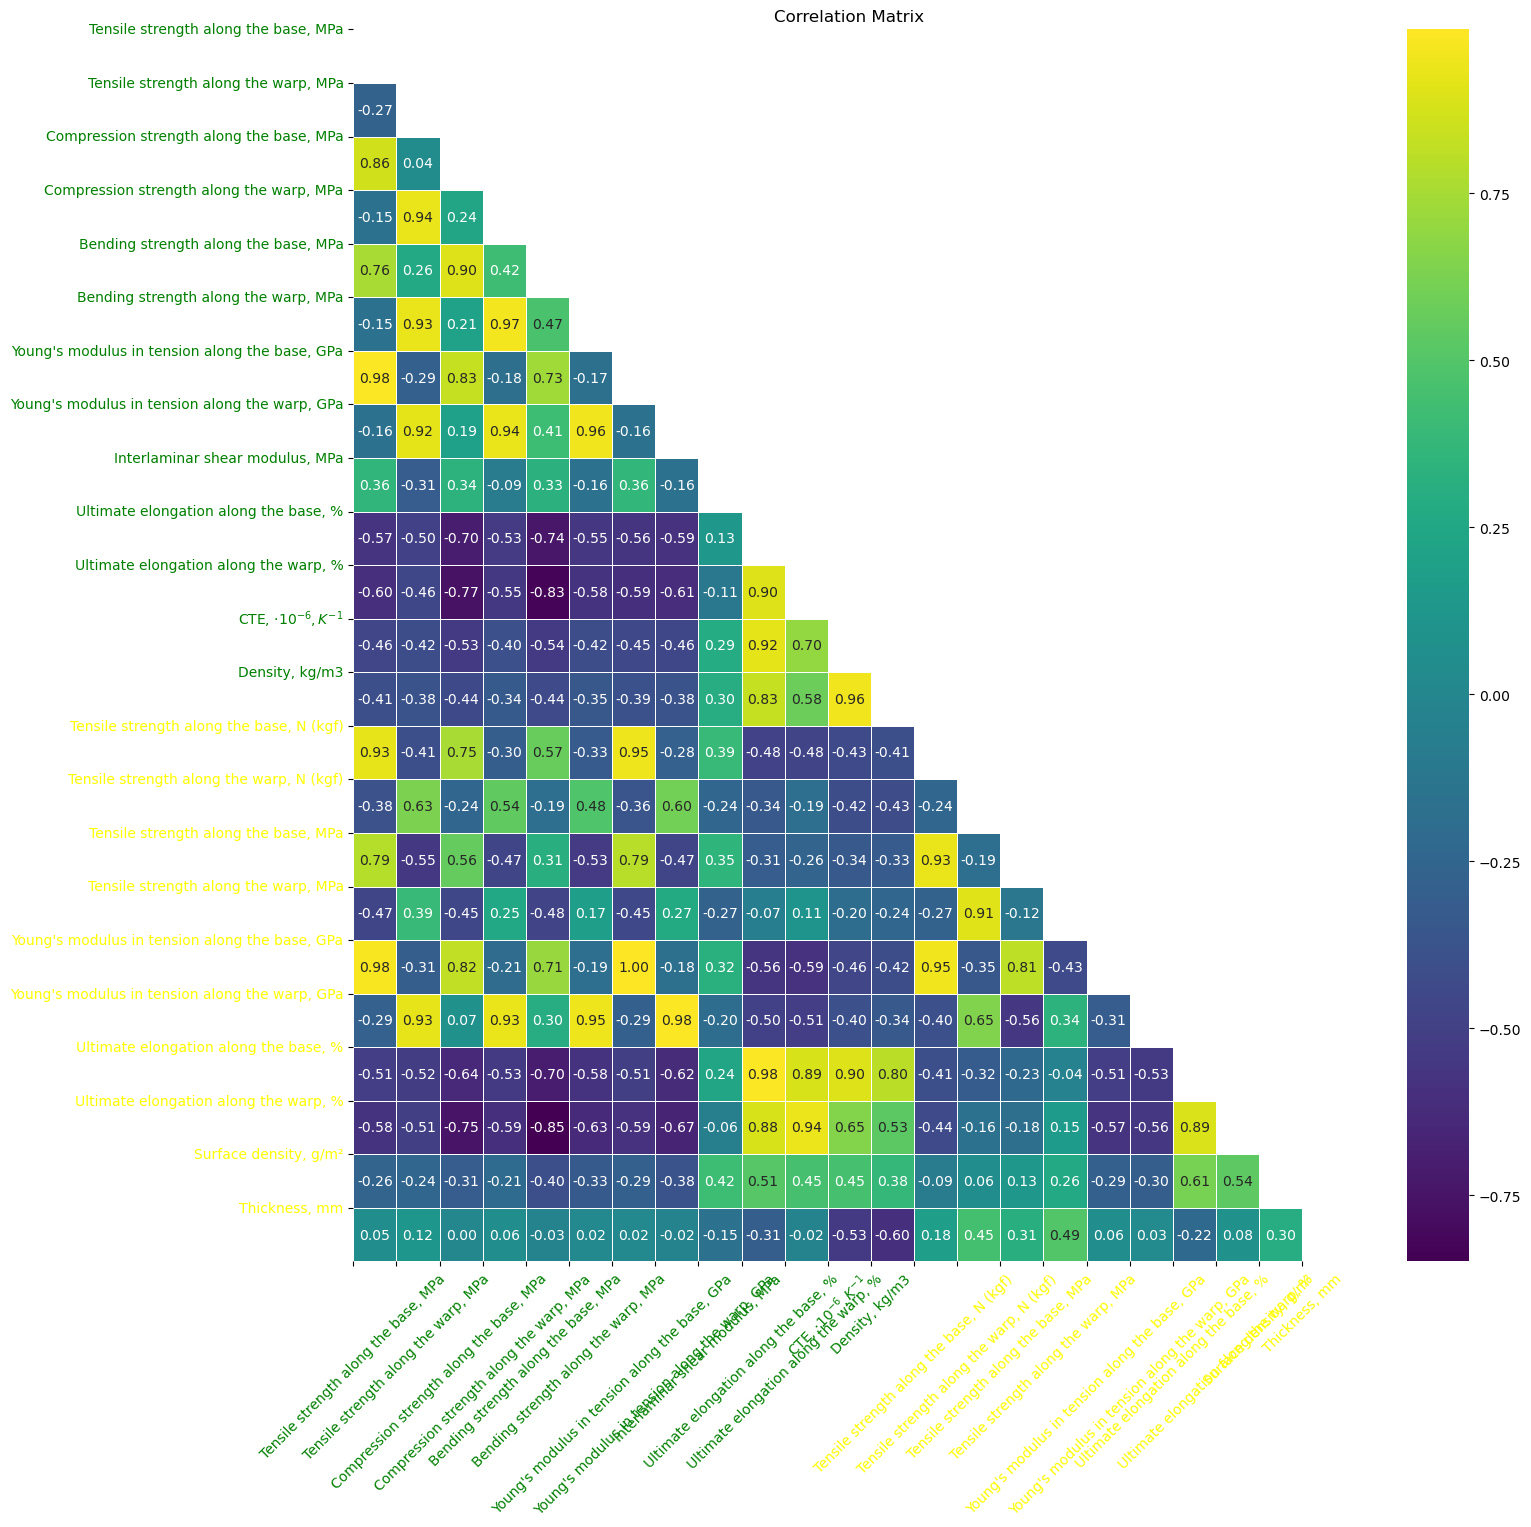

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine labels from labels_1 and labels_2
labels = labels_1 + labels_2

# Drop NaN values from the DataFrame
data_clean = data[cols_without_nans + tkani].dropna()

# Calculate the correlation matrix
corr_matrix = data_clean.corr()

# Create a color mask for highlighting different label groups
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5,
            xticklabels=labels, yticklabels=labels, mask=mask)

# Highlight labels_1 in green
plt.xticks(np.arange(len(labels)), labels, rotation=45, color='green', fontsize=10)
plt.yticks(np.arange(len(labels)), labels, rotation=0, color='green', fontsize=10)

# Highlight labels_2 in yellow
for i in range(len(labels_1), len(labels)):
    plt.gca().get_xticklabels()[i].set_color('yellow')
    plt.gca().get_yticklabels()[i].set_color('yellow')

plt.title('Correlation Matrix')
plt.show()


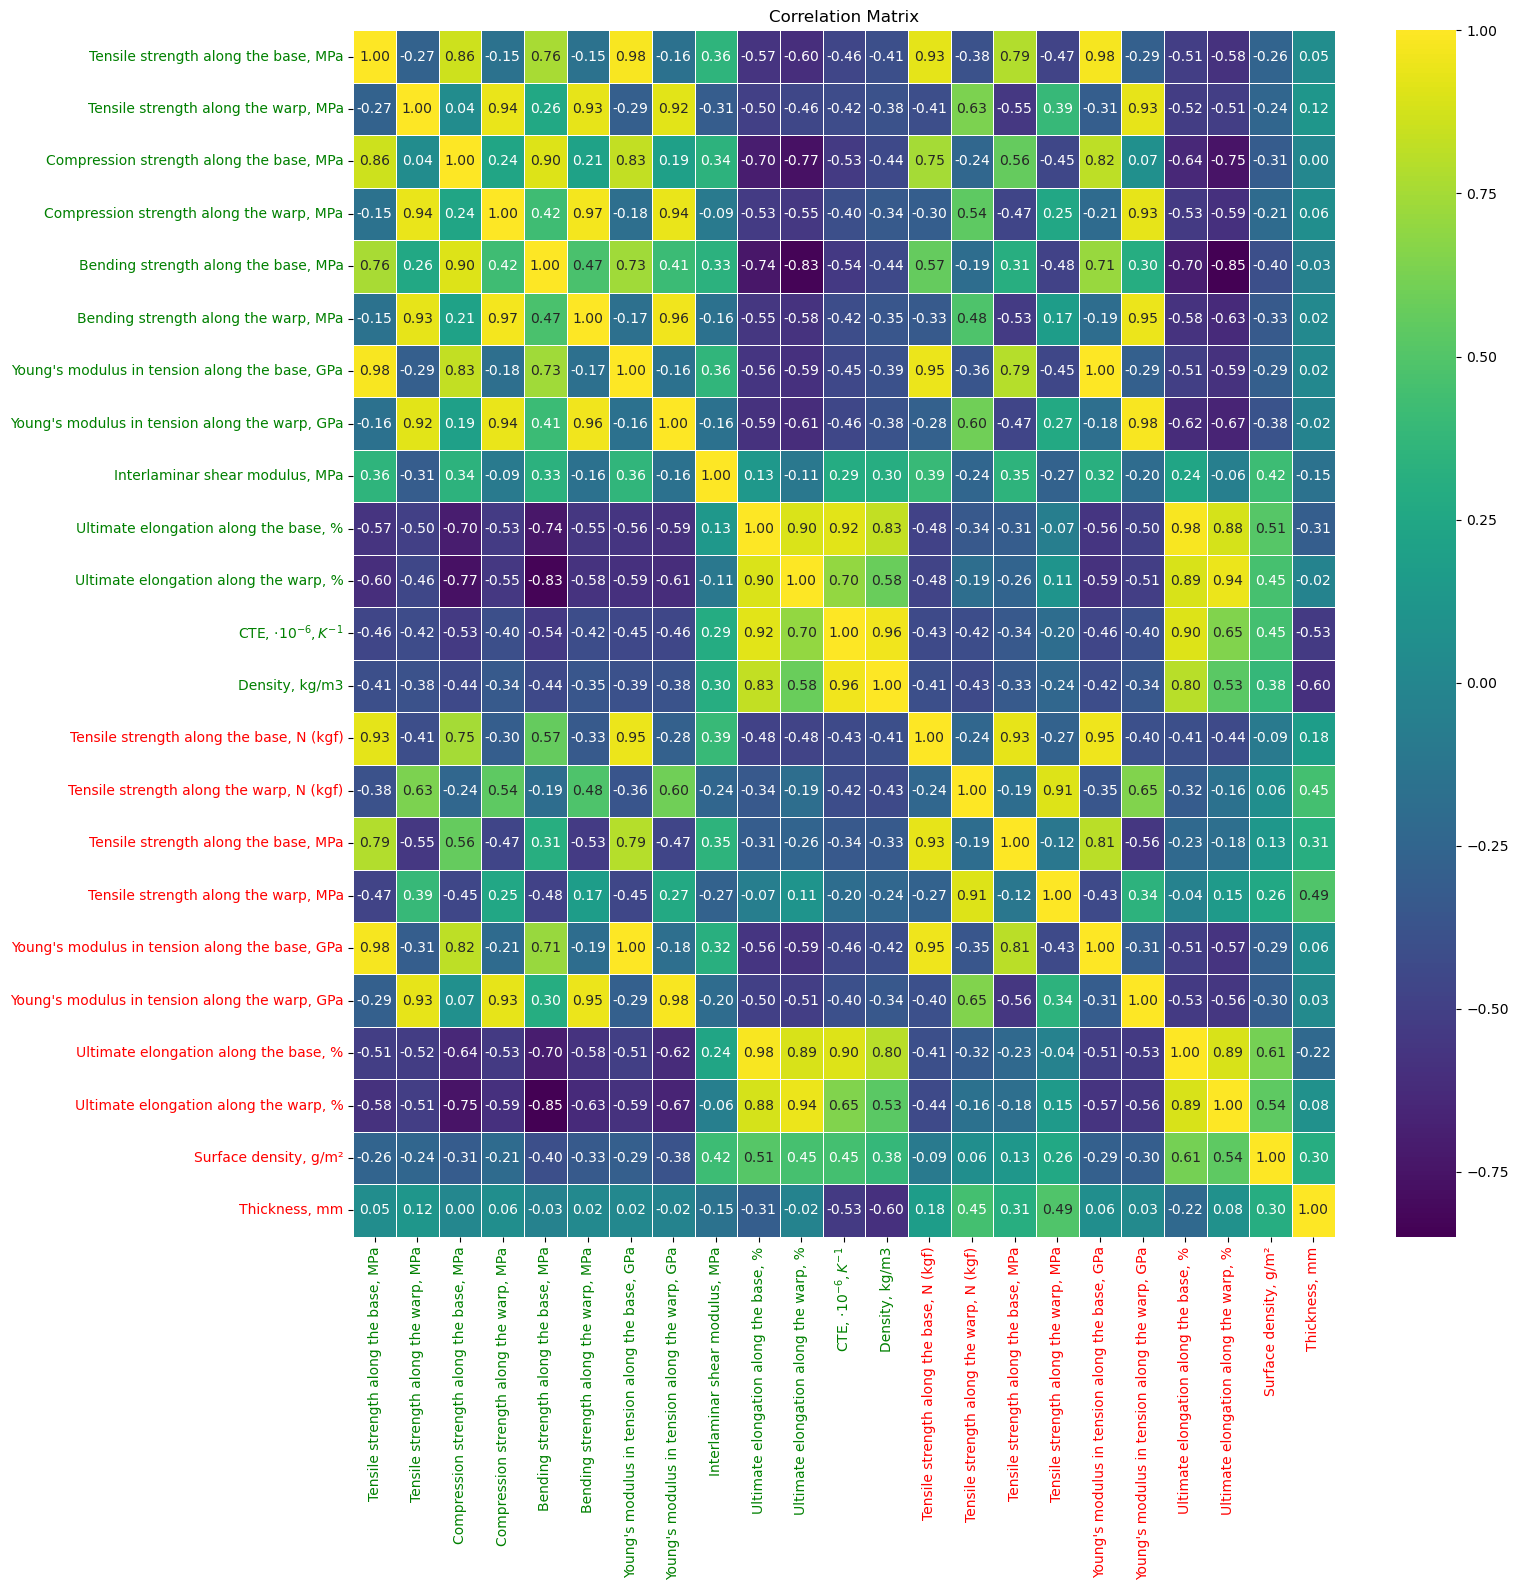

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine labels from labels_1 and labels_2
labels = labels_1 + labels_2

# Drop NaN values from the DataFrame
data_clean = data[cols_without_nans + tkani].dropna()

# Calculate the correlation matrix
corr_matrix = data_clean.corr()

# Create a color mask for highlighting different label groups
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5,
            xticklabels=labels, yticklabels=labels, annot_kws={"verticalalignment": 'center'})

# Highlight labels_1 in green
plt.xticks(np.arange(len(labels))+0.5, labels, rotation=90, color='green', fontsize=10)
plt.yticks(np.arange(len(labels))+0.5, labels, rotation=0, color='green', fontsize=10)

# Highlight labels_1 in green
for i in range(len(labels_1)):
    plt.gca().get_xticklabels()[i].set_color('green')
    plt.gca().get_yticklabels()[i].set_color('green')

# Highlight labels_2 in yellow
for i in range(len(labels_1), len(labels)):
    plt.gca().get_xticklabels()[i].set_color('red')
    plt.gca().get_yticklabels()[i].set_color('red')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('corr.pdf')
plt.show()



In [59]:
np.arange(len(labels))+0.5

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5])

In [64]:
np.arange(len(labels))-0.5

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
       21.5])